In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col 
from sklearn.preprocessing import PolynomialFeatures
from lightgbm import LGBMRegressor
from scipy import stats
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tabulate import tabulate


In [11]:
#reading the dataset
funda_HPI=pd.read_csv('C:/Users/dodih/Documents/Python Scripts/Thesis data/Data/funda_HPI.csv')

### Preparing the data for applying ML models 

In [12]:
# Select the columns you want to use for linear regression
columns = ['city','price_index','energy_label', 'log_house_area', 'house_type','log_house_age']

# Extract the selected columns from the dataset
data = funda_HPI[columns]

In [13]:
# One-hot encode the 'energy label', 'city' and 'house type' variables to create dummy variables
data = pd.get_dummies(data, columns=['energy_label'], prefix=['label'])
data = pd.get_dummies(data, columns=['city'], prefix=['city'])
data = pd.get_dummies(data, columns=['house_type'], prefix=['type'])

In [14]:
# Extract the dependent variable (Price_now)
y=funda_HPI['log_house_price']

#determine the independent varaiables in the model 
data=data[['city_amsterdam','city_den-haag','city_rotterdam','city_utrecht','type_appartement','type_huis','price_index','log_house_area','log_house_age','label_A','label_B','label_C','label_D','label_E','label_F','label_G']]

#divide the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# Linear regression model

In [23]:
# Create an instance of the LinearRegression model
lr_model = LinearRegression()

# Fit the model to the data
lr_model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", lr_mse)

lr_rmse = np.sqrt(lr_mse)
print("Root Mean Squared Error (RMSE):", lr_rmse)

lr_r2 = r2_score(y_test, y_pred)
print("R2 Score:", lr_r2)

Mean Squared Error: 0.055268805756369874
Root Mean Squared Error (RMSE): 0.23509318526144027
R2 Score: 0.698409194289994


In [38]:
#extract more information from the LR model
# Add a constant column to the data
X = sm.add_constant(X_test)

# Create an instance of the OLS (ordinary least squares) model
model_ols = sm.OLS(y_test, X)

# Fit the model
results = model_ols.fit()

# Get the summary of the model
summary = results.summary()

# Print the summary to see the p-values
print(summary)

                            OLS Regression Results                            
Dep. Variable:        log_house_price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     637.7
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:10:04   Log-Likelihood:                 112.26
No. Observations:                3567   AIC:                            -196.5
Df Residuals:                    3553   BIC:                            -110.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.6639      0.047  

In [25]:
#extract the summray column which contains the coef 
res = summary_col(results)
print(res)


                 log_house_price
--------------------------------
const            4.6639         
                 (0.0469)       
city_amsterdam   1.4714         
                 (0.0108)       
city_den-haag    1.0090         
                 (0.0134)       
city_rotterdam   0.9904         
                 (0.0163)       
city_utrecht     1.1932         
                 (0.0155)       
type_appartement 2.3296         
                 (0.0224)       
type_huis        2.3344         
                 (0.0256)       
price_index      0.0468         
                 (0.0644)       
log_house_area   0.8526         
                 (0.0120)       
log_house_age    0.0614         
                 (0.0062)       
label_A          0.7842         
                 (0.0125)       
label_B          0.6873         
                 (0.0128)       
label_C          0.6568         
                 (0.0107)       
label_D          0.6596         
                 (0.0116)       
label_E  

#  Polynomial Regression

In [42]:
# Fitting Polynomial Regression to the dataset

poly2 = PolynomialFeatures(degree=2, include_bias=True)
X_poly = poly2.fit_transform(X_train)

# Fit Linear model with poly features
poly_model = LinearRegression().fit(X_poly,y_train)

In [43]:
# Make predictions on the test set
X_polytest = poly2.fit_transform(X_test)
y_pred = poly_model.predict(X_polytest)

# Evaluate the model
poly_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", poly_mse)

poly_rmse = np.sqrt(poly_mse)
print("Root Mean Squared Error (RMSE):", poly_rmse)

poly_r2 = r2_score(y_test, y_pred)
print("R2 Score:", poly_r2)

Mean Squared Error: 0.04019766083431544
Root Mean Squared Error (RMSE): 0.2004935431237511
R2 Score: 0.780649414208095


In [44]:
poly_model_2 = sm.OLS(y_test, X_polytest).fit()

In [45]:
# Get the summary of the model
summary = poly_model_2.summary()

# Print the summary to see the p-values
print(summary)

                            OLS Regression Results                            
Dep. Variable:        log_house_price   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     171.0
Date:                Mon, 10 Jul 2023   Prob (F-statistic):               0.00
Time:                        00:14:18   Log-Likelihood:                 733.98
No. Observations:                3567   AIC:                            -1314.
Df Residuals:                    3490   BIC:                            -838.1
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7380      0.635      5.888      0.0

the Polynomial Regression with degree 3 and 4 was tried but the difference in so small

# Random forest

In [46]:
# Create and fit the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", rf_mse)

rf_rmse = np.sqrt(rf_mse)
print("Root Mean Squared Error (RMSE):", rf_rmse)

# Calculate the R2 score
rf_r2 = r2_score(y_test, y_pred)
print("R2 Score:", rf_r2)


Mean Squared Error: 0.034449670969638906
Root Mean Squared Error (RMSE): 0.18560622556810671
R2 Score: 0.8120150438933529


In [47]:
# Get feature importances from the model
importances = rf_model.feature_importances_

# Create an empty DataFrame
df_rf_impo = pd.DataFrame(columns=['Feature', 'Importance'])

for feature, importance in zip(X_train.columns, importances):
    
    # Create a temporary DataFrame for the current feature and importance
    temp_df = pd.DataFrame({'Feature': [feature], 'Importance': [round(importance, 4)]})
    
    # Concatenate the temporary DataFrame with df_rf_impo
    df_rf_impo = pd.concat([df_rf_impo, temp_df], ignore_index=True)

# Print the DataFrame
df_rf_impo=df_rf_impo.sort_values(by='Importance', ascending=False)
print(df_rf_impo)

             Feature Importance
7     log_house_area     0.6113
8      log_house_age     0.1469
0     city_amsterdam     0.1418
6        price_index     0.0251
3       city_utrecht      0.023
9            label_A     0.0096
4   type_appartement     0.0061
5          type_huis     0.0061
11           label_C     0.0055
12           label_D     0.0047
10           label_B     0.0042
13           label_E      0.004
15           label_G     0.0035
2     city_rotterdam     0.0029
14           label_F     0.0028
1      city_den-haag     0.0025


In [48]:

# Plotting the data as a bar plot
plt.figure(figsize=(10, 6),dpi=1000)  # Set the size of the figure
plt.barh(df_rf_impo['Feature'], df_rf_impo['Importance'])  # Create the bar plot
plt.xlabel('Importance')  # Set the x-axis label
plt.ylabel('Features')  # Set the y-axis label
plt.title('Importance of Features of RF model')  # Set the title of the plot
#plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()  # Display the plot


it appears that the energy labels (label_A, label_B, label_C, label_D, label_E, label_F, label_G) have relatively low importance in determining the house prices. The importance values for these energy labels range from 0.0026 to 0.0093.

It indicates that the energy label changes alone may not have a strong overall effect on house prices, as the model assigns similar importance to most of the energy labels.

# LightGBM Regressor
LGBMRegressor refers to the LightGBM Regressor, which is a machine learning model specifically designed for regression tasks. LightGBM is a gradient boosting framework that uses tree-based learning algorithms.

LightGBM is known for its efficiency and speed in handling large-scale datasets. 

In [49]:

# Creating an object for model and fitting it on training data set
lg_model = LGBMRegressor(subsample=0.9,n_estimators=110)
lg_model.fit(X_train, y_train)
 
# Predicting the Target variable
pred = lg_model.predict(X_test)


In [50]:
#Evalute the model

lg_mse = mean_squared_error(y_test, pred)
print("Mean Squared Error:", lg_mse)

lg_rmse = np.sqrt(lg_mse)
print("Root Mean Squared Error (RMSE):", lg_rmse)

# Calculate the R2 score
lg_r2 = r2_score(y_test,pred)
print("R2 Score:", lg_r2)

Mean Squared Error: 0.03168073493932036
Root Mean Squared Error (RMSE): 0.17799082824494178
R2 Score: 0.8271245733451809


In [55]:
#get the features Importance

boost = lg_model.booster_

# Feature Importance
feature_importance = boost.feature_importance()
feature_names = boost.feature_name()

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
sorted_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(sorted_importance_df)


             Feature  Importance
8      log_house_age        1218
7     log_house_area        1080
6        price_index         248
4   type_appartement         138
0     city_amsterdam         123
1      city_den-haag          96
9            label_A          82
2     city_rotterdam          80
3       city_utrecht          67
15           label_G          43
13           label_E          31
14           label_F          29
11           label_C          25
12           label_D          21
10           label_B          19
5          type_huis           0


In [56]:

# Plotting the data as a bar plot
plt.figure(figsize=(10, 6), dpi=1000)  # Set the size of the figure
plt.barh(sorted_importance_df['Feature'],sorted_importance_df['Importance'])  # Create the bar plot
plt.xlabel('Importance')  # Set the x-axis label
plt.ylabel('Features')  # Set the y-axis label
plt.title('Importance of Features of LGBM model')  # Set the title of the plot
plt.show()  # Display the plot


# comparsion between models

In [57]:


# Create a list to store the model names and their respective performance metrics
model_performance = [
    ['Linear Regression', round(lr_mse,3), round(lr_rmse,3), round(lr_r2,3)],  # Replace with the actual model names and performance metrics
    ['Polynomial Regression', round(poly_mse,3), round(poly_rmse,3), round(poly_r2,3)],
    ['Random Forest', round(rf_mse,3), round(rf_rmse,3), round(rf_r2,3)],
    ['LightGBM Regressor ',round(lg_mse,3), round(lg_rmse,3), round(lg_r2,3)]
]

# Define the headers for the table
headers = ['Model', 'MSE', 'RMSE', 'R2 Score']

# Print the table using the tabulate function
table = tabulate(model_performance, headers=headers, tablefmt='grid')
print(table)

+-----------------------+-------+--------+------------+
| Model                 |   MSE |   RMSE |   R2 Score |
+=======================+=======+========+============+
| Linear Regression     | 0.055 |  0.235 |      0.7   |
+-----------------------+-------+--------+------------+
| Polynomial Regression | 0.04  |  0.2   |      0.781 |
+-----------------------+-------+--------+------------+
| Random Forest         | 0.034 |  0.186 |      0.812 |
+-----------------------+-------+--------+------------+
| LightGBM Regressor    | 0.032 |  0.178 |      0.827 |
+-----------------------+-------+--------+------------+


# sensitivity analysis steps 
we use sensitivity analysis to determine how different values of an independent variable affect a specific dependent variable under a given set of assumptions.


to observe the effect of changes in the energy label on sell prices, we will apply sensitivity analysis using LG model


In [58]:
predictions = pd.Series(pred)
#take a copy of the test dataset
baseline=X_test.copy()
# Reset the index of the DataFrame in order to add the predition correctly
baseline =baseline.reset_index(drop=True)
#add the test data prediction to the dataset
baseline['price_pred']= predictions

In [59]:
#extract the predictions of a certain class label, this will serve as the baseline values for comparision
price_baseline_pred_D=baseline.loc[baseline['label_D']==1,'price_pred']

In [60]:
#extract the datapoints of a certain energy label without the price prdiction column
test_baseline_D=baseline.loc[baseline['label_D'] == 1, baseline.columns != 'price_pred']

In [61]:
# add the perturbation,(change the energy label of the houses that have a certain class)
test_baseline_A=test_baseline_D.copy()
test_baseline_A['label_D']=0
test_baseline_A['label_A']=1

In [63]:
# make prediction for the data point that faced a perturbation
pred_test_baseline_A= lg_model.predict(test_baseline_A)

In [64]:
#add another perturbation,
# add the perturbation,(change the energy label of the houses that have a certain class)
test_baseline_B=test_baseline_D.copy()
test_baseline_B['label_D']=0
test_baseline_B['label_B']=1

In [65]:
# make prediction for the data point that faced a perturbation
pred_test_baseline_B= lg_model.predict(test_baseline_B)

In [66]:
#add another perturbation,
# add the perturbation,(change the energy label of the houses that have a certain class)
test_baseline_C=test_baseline_D.copy()
test_baseline_C['label_D']=0
test_baseline_C['label_C']=1

In [67]:
# make prediction for the data point that faced a perturbation
pred_test_baseline_C= lg_model.predict(test_baseline_C)

In [72]:
#add another perturbation,
# add the perturbation,(change the energy label of the houses that have a certain class)
test_baseline_E=test_baseline_D.copy()
test_baseline_E['label_D']=0
test_baseline_E['label_E']=1

In [73]:
# make prediction for the data point that faced a perturbation
pred_test_baseline_E= lg_model.predict(test_baseline_E)

In [74]:
#add another perturbation,
# add the perturbation,(change the energy label of the houses that have a certain class)
test_baseline_F=test_baseline_D.copy()
test_baseline_F['label_D']=0
test_baseline_F['label_F']=1

In [75]:
# make prediction for the data point that faced a perturbation
pred_test_baseline_F= lg_model.predict(test_baseline_F)

In [76]:
#add another perturbation,
# add the perturbation,(change the energy label of the houses that have a certain class)
test_baseline_G=test_baseline_D.copy()
test_baseline_G['label_D']=0
test_baseline_G['label_G']=1

In [77]:
# make prediction for the data point that faced a perturbation
pred_test_baseline_G= lg_model.predict(test_baseline_G)

In [79]:
#since the prices predictions are log we can apply inverse transformation to interpret the results and compare them
perturbation_A=np.mean(np.exp(pred_test_baseline_A))
perturbation_B=np.mean(np.exp(pred_test_baseline_B))
perturbation_C=np.mean(np.exp(pred_test_baseline_C))
baseline_D=np.mean(np.exp(price_baseline_pred_D))
perturbation_E=np.mean(np.exp(pred_test_baseline_E))
perturbation_F=np.mean(np.exp(pred_test_baseline_F))
perturbation_G=np.mean(np.exp(pred_test_baseline_G))
# exp then mean
print('perturbation A',perturbation_A)
print('perturbation B',perturbation_B)
print('perturbation C',perturbation_C)
print('baseline D',baseline_D)
print('perturbation E',perturbation_E)
print('perturbation F',perturbation_F)
print('perturbation G',perturbation_G)

perturbation A 477893.0012465819
perturbation B 450062.1761073066
perturbation C 445931.9920397911
baseline D 441927.4076972441
perturbation E 433445.56104369194
perturbation F 427794.6852269002
perturbation G 413069.8267852307


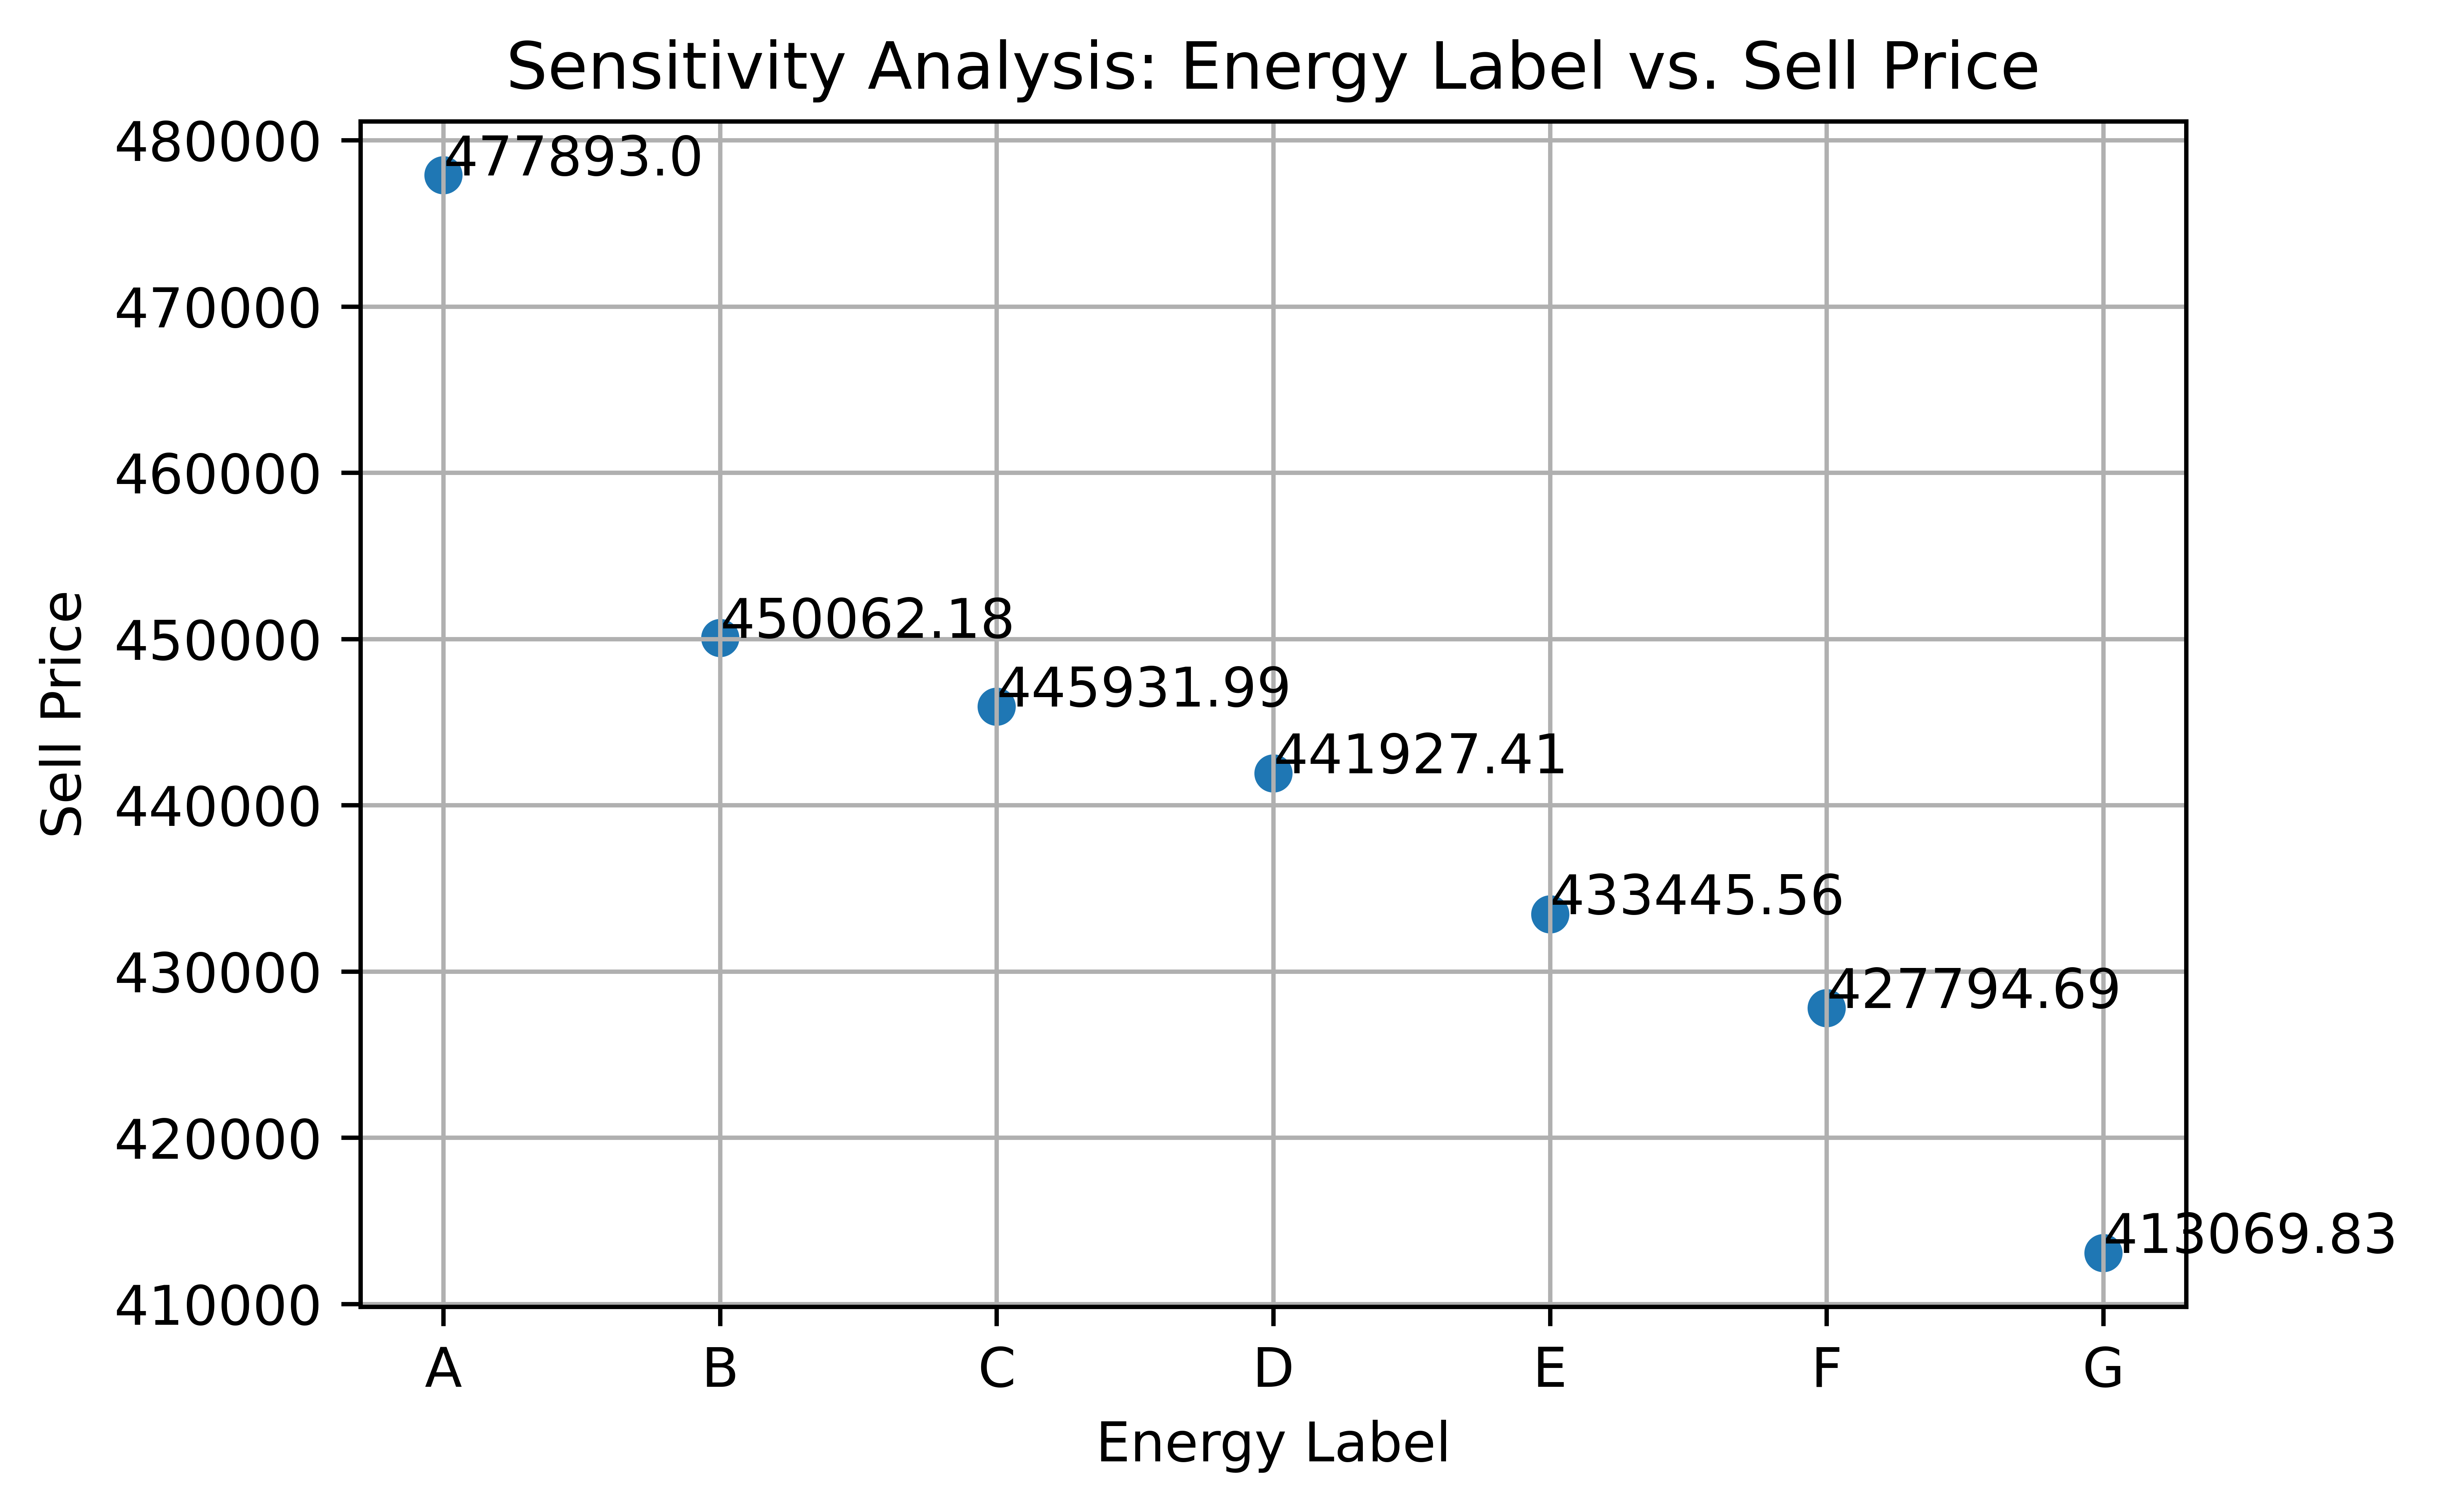

In [80]:
#plot a figure to compare the mean of prices for each energy label 
energy_labels = ['A', 'B', 'C', 'D','E','F','G']  # Energy label values
sell_prices = [perturbation_A,perturbation_B, perturbation_C, baseline_D, perturbation_E, perturbation_F,perturbation_G]  # Corresponding sell prices

# Plotting the data
plt.figure(dpi=1000)
plt.scatter(energy_labels, sell_prices)
plt.xlabel('Energy Label')
plt.ylabel('Sell Price')
plt.title('Sensitivity Analysis: Energy Label vs. Sell Price')
plt.grid(True)


# Adding labels to data points
for i in range(len(energy_labels)):
    plt.text(energy_labels[i], sell_prices[i], str(round(sell_prices[i], 2)))

# Display the plot
plt.show()

In [82]:
#percentage rise to A
def calculate_percentage_rise(transformed_value1, transformed_value2):
    percentage_rise = ((transformed_value2 - transformed_value1) / transformed_value1) * 100
    return percentage_rise

#the transformed values
transformed_valueB = np.mean(np.exp(pred_test_baseline_B))
transformed_valueA = np.mean(np.exp(pred_test_baseline_A))

# Calculating the percentage rise B to A
percentage_rise_B_to_A = calculate_percentage_rise(transformed_valueB, transformed_valueA)
print("Percentage rise B to A:", percentage_rise_B_to_A)

# Calculate and print percentage rises for C to A, D to A, E to A, F to A, and G to A
transformed_valueC = np.mean(np.exp(pred_test_baseline_C))
percentage_rise_C_to_A = calculate_percentage_rise(transformed_valueC, transformed_valueA)
print("Percentage rise C to A:", percentage_rise_C_to_A)

transformed_valueD = np.mean(np.exp(price_baseline_pred_D))
percentage_rise_D_to_A = calculate_percentage_rise(transformed_valueD, transformed_valueA)
print("Percentage rise D to A:", percentage_rise_D_to_A)

transformed_valueE = np.mean(np.exp(pred_test_baseline_E))
percentage_rise_E_to_A = calculate_percentage_rise(transformed_valueE, transformed_valueA)
print("Percentage rise E to A:", percentage_rise_E_to_A)

transformed_valueF = np.mean(np.exp(pred_test_baseline_F))
percentage_rise_F_to_A = calculate_percentage_rise(transformed_valueF, transformed_valueA)
print("Percentage rise F to A:", percentage_rise_F_to_A)

transformed_valueG = np.mean(np.exp(pred_test_baseline_G))
percentage_rise_G_to_A = calculate_percentage_rise(transformed_valueG, transformed_valueA)
print("Percentage rise G to A:", percentage_rise_G_to_A)


Percentage rise B to A: 6.183773402153148
Percentage rise C to A: 7.167238452795041
Percentage rise D to A: 8.138348724905779
Percentage rise E to A: 10.254445816878397
Percentage rise F to A: 11.7108317961243
Percentage rise G to A: 15.693030635000845


In [81]:
#the precentage of the decrease in label G when downgrading from D to G
transformed_valueG = np.mean(np.exp(pred_test_baseline_G))
percentage_rise_G_to_D = calculate_percentage_rise(transformed_valueD, transformed_valueG)
print("Percentage rise G to D:", percentage_rise_G_to_D)

Percentage rise G to D: -6.5299369103133635


In [86]:
#the percentage of upgrades in label when upgrading to B
percentage_rise_D_to_B = calculate_percentage_rise(transformed_valueD, transformed_valueB)
print("Percentage rise D to B:", percentage_rise_D_to_B)

Percentage rise D to B: 1.8407476586370732


In [87]:
#the percentage of upgrades in label when upgrading to C
percentage_rise_D_to_C = calculate_percentage_rise(transformed_valueD, transformed_valueC)
print("Percentage rise D to C:", percentage_rise_D_to_C)

Percentage rise D to C: 0.9061633817675453


In [88]:
#the precentage of the decrease in label G when downgrading from D to E
percentage_rise_E_to_D = calculate_percentage_rise(transformed_valueD, transformed_valueE)
print("Percentage rise E to D:", percentage_rise_E_to_D)

Percentage rise E to D: -1.9192850467791969


In [83]:
#the precentage of the decrease in label G when downgrading from D to F
percentage_rise_F_to_D = calculate_percentage_rise(transformed_valueD, transformed_valueF)
print("Percentage rise F to D:", percentage_rise_F_to_D)

Percentage rise F to D: -3.197973745051342


Based on the given values, it can be concluded that increasing the energy label (as indicated by Perturbation A) has the highest positive impact on the sell price, followed by Perturbations B and C, while the baseline value represents thesell price without any perturbations. These results suggest that higher energy label ratings are associated with higher sell prices, supporting the hypothesis that changes in the energy label variable influence the sell price.
Comparing the mean sell prices allows you to assess the average effect of changing the energy label on the sell prices.

# ANOVA Test
ANOVA is a statistical analysis used to draw inference about the influence of different categorical independent variables on a continuous dependent variable
you can apply one-way ANOVA to evaluate whether the changes in the energy label variable lead to statistically significant differences in sell prices.


In [105]:
#Converting the treatment groups into series
series_A = pd.Series(np.exp(pred_test_baseline_A))
series_B = pd.Series(np.exp(pred_test_baseline_B))
series_C = pd.Series(np.exp(pred_test_baseline_C))
series_D = pd.Series(np.exp(price_baseline_pred_D))
series_E = pd.Series(np.exp(pred_test_baseline_E))
series_F = pd.Series(np.exp(pred_test_baseline_F))
series_G = pd.Series(np.exp(pred_test_baseline_G))

In [106]:
len(np.exp(price_baseline_pred_D))

677

In [108]:
series_D.reset_index(drop=True,inplace=True)

In [109]:
# Levene's test or Bartlett's test to assess the homogeneity of variance assumption. 
_, p_value = stats.levene(series_A, series_B, series_C,series_D ,series_E, series_F, series_G )  # Provide the data for each group
significance_level = 0.05  # Set your desired significance level
if p_value > significance_level:
    print("The variances appear to be homogeneous across groups.", p_value)
else:
    print("The variances do not appear to be homogeneous across groups.", p_value)

The variances appear to be homogeneous across groups. 0.3136588314698818


In [110]:
# Create a DataFrame with columns from series_A, series_B, series_C
pred_label = pd.DataFrame({'pred_A': series_A, 'pred_B': series_B, 'pred_C': series_C,'pred_D':series_D,'pred_E': series_E, 'pred_F': series_F, 'pred_G': series_G})
pred_label 

,pred_A,pred_B,pred_C,pred_D,pred_E,pred_F,pred_G
0,412200.508109,403450.765284,396427.997655,378175.698558,362648.899478,336155.065271,346468.609348
1,322233.316548,313066.484752,310097.466375,308720.325457,336745.952004,314650.788923,319786.665755
2,480558.477345,479781.123739,473162.903606,466952.694863,458395.785567,451975.026622,449929.768552
3,258701.424788,265764.501671,258144.853622,258725.226786,254293.368022,241116.739459,232634.377832
4,632890.125499,516597.536791,509262.187926,488122.966067,447471.449968,456628.079078,438792.018549
...,...,...,...,...,...,...,...
672,240457.478070,230165.191957,227386.237666,227897.457891,226614.851092,221461.418086,211094.905624
673,343038.763979,345530.329111,339247.491756,338723.725399,330983.727249,325468.956993,303062.003707
674,434325.690331,415439.426950,415050.056592,403272.115291,391439.720543,372991.404011,360072.683912
675,534981.622019,479161.925893,472878.335633,470063.228060,471920.884749,456443.819383,449324.791806


In [114]:
# Step 3: Conduct a normality test (Shapiro-Wilk test)
statistic, p_value = stats.shapiro(pred_label['pred_A'])
print("Shapiro-Wilk Test - Statistic:", statistic)
print("Shapiro-Wilk Test - p-value:", p_value)

statistic, p_value = stats.shapiro(pred_label['pred_B'])
print("Shapiro-Wilk Test - Statistic:", statistic)
print("Shapiro-Wilk Test - p-value:", p_value)

statistic, p_value = stats.shapiro(pred_label['pred_C'])
print("Shapiro-Wilk Test - Statistic:", statistic)
print("Shapiro-Wilk Test - p-value:", p_value)

statistic, p_value = stats.shapiro(pred_label['pred_D'])
print("Shapiro-Wilk Test - Statistic:", statistic)
print("Shapiro-Wilk Test - p-value:", p_value)

statistic, p_value = stats.shapiro(pred_label['pred_E'])
print("Shapiro-Wilk Test - Statistic:", statistic)
print("Shapiro-Wilk Test - p-value:", p_value)

statistic, p_value = stats.shapiro(pred_label['pred_F'])
print("Shapiro-Wilk Test - Statistic:", statistic)
print("Shapiro-Wilk Test - p-value:", p_value)

statistic, p_value = stats.shapiro(pred_label['pred_G'])
print("Shapiro-Wilk Test - Statistic:", statistic)
print("Shapiro-Wilk Test - p-value:", p_value)

Shapiro-Wilk Test - Statistic: 0.8406538963317871
Shapiro-Wilk Test - p-value: 1.7464410389198812e-25
Shapiro-Wilk Test - Statistic: 0.8059260845184326
Shapiro-Wilk Test - p-value: 1.0235568467669792e-27
Shapiro-Wilk Test - Statistic: 0.8096883296966553
Shapiro-Wilk Test - p-value: 1.7225700385944154e-27
Shapiro-Wilk Test - Statistic: 0.805625855922699
Shapiro-Wilk Test - p-value: 9.822418938964814e-28
Shapiro-Wilk Test - Statistic: 0.8032517433166504
Shapiro-Wilk Test - p-value: 7.103799822109611e-28
Shapiro-Wilk Test - Statistic: 0.8074914813041687
Shapiro-Wilk Test - p-value: 1.269850064362566e-27
Shapiro-Wilk Test - Statistic: 0.7912713289260864
Shapiro-Wilk Test - p-value: 1.448335308995037e-28


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


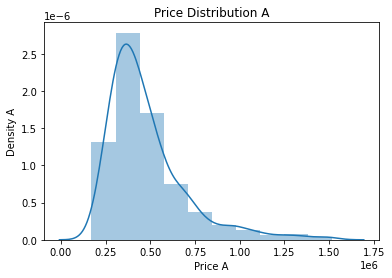

In [115]:
# Plotting the distribution # check normality for ANOVA
sns.distplot(pred_label['pred_A'], bins=10, kde=True)
plt.xlabel('Price A')
plt.ylabel('Density A')
plt.title('Price Distribution A')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


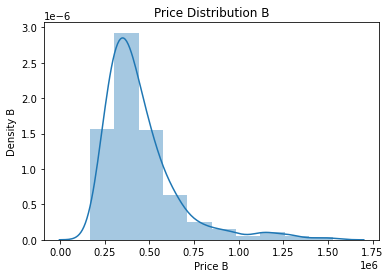

In [116]:
# Plotting the distribution # check normality for ANOVA
sns.distplot( pred_label['pred_B'], bins=10, kde=True)
plt.xlabel('Price B')
plt.ylabel('Density B')
plt.title('Price Distribution B')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


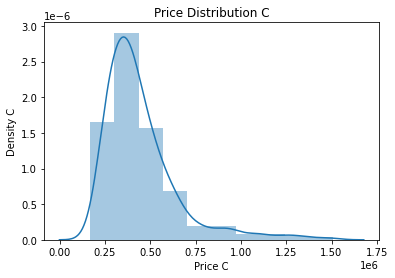

In [117]:
# Plotting the distribution # check normality for ANOVA
sns.distplot( pred_label['pred_C'], bins=10, kde=True)
plt.xlabel('Price C')
plt.ylabel('Density C')
plt.title('Price Distribution C')
plt.show()

Although we attempted various data transformations to meet the normality assumption for the ANOVA test, the data continues to violate this assumption. However, it is important to note that all groups exhibit a similar distribution, are continuous variables, and are independent from one another. Considering these factors, we have chosen to employ the Kruskal-Wallis test, which does not rely on the assumption of normality, to analyze the data. This non-parametric test allows for the comparison of medians across multiple groups.


By non-parametric we mean, the data is not assumed to become from a particular distribution. The main objective of this test is used to determine whether there is a statistical difference between the medians of at least three independent groups. 

Hypothesis:
The Kruskal-Wallis Test has the null and alternative hypotheses as discussed below:

The null hypothesis (H0): The median is the same for all the data groups.
The alternative hypothesis: (Ha): The median is not equal for all the data groups.
        

In [119]:
# Method 1: Non-parametric test (Kruskal-Wallis test)
kruskal_test_stat, kruskal_p_value = stats.kruskal(pred_label['pred_A'], pred_label['pred_B'], pred_label['pred_C'],pred_label['pred_D'],pred_label['pred_E'], pred_label['pred_F'], pred_label['pred_G'])
print("Kruskal-Wallis Test - Statistic:", kruskal_test_stat)
print("Kruskal-Wallis Test - p-value:", kruskal_p_value)

Kruskal-Wallis Test - Statistic: 62.43362615570999
Kruskal-Wallis Test - p-value: 1.4396725420342192e-11


the Kruskal-Wallis test results indicate that there are significant differences among the groups. The test statistic value is relatively high, indicating a substantial difference among the medians, and the low p-value suggests that this difference is statistically significant.